# 합성곱 신경망(CNN; Convolution Neural Network)


*   CNN은 이미지 처리에 탁월한 성능을 보이는 신경망이다.
*   합성곱층(Convolution layer)과 풀링층(Pooling layer)로 구성된다.



---



(참고자료:
http://cs231n.github.io/convolutional-networks )

# 1.1 합성곱 신경망의 대두

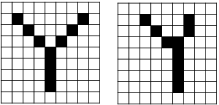

위의 그림을 사람이 본다면 둘 다 y로 인식할 수 있지만 기계가 이를 본다면 둘의 픽셀값이 다르므로 이 둘을 다른 대상으로 인식한다. 이미지를 기계가 인식하기 위해서는 공간적인 구조(spatial structure)를 보존하면서 학습을 시켜야 한다. 이를 위해 사용하는 것이 CNN이다.

# 1.2 채널 (Channel)

이미지는 (높이, 너비, 채널(깊이))이라는 3차원 텐서이다. 여기서 높이은 세로 방향의 픽셀 수, 너비는 가로 방향의 픽셀 수, 채널은 색 성분을 의미한다. 흑백 이미지라면 채널은 1개가 될 것이다. 컬러 이미지라면 아래의 그림처럼 RGB, 3가지로 구성이 될 것이므로 채널은 3개가 된다.

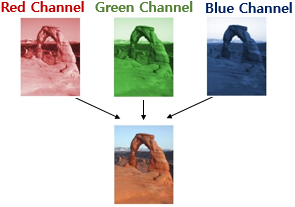

ex) 높이가 20이고 너비가 20인 컬러이미지는 (20 x 20 x 3)의 크기를 가지는 3차원 텐서이다.

# 1.3 합성곱 연산(Convolution operation)








합성곱층은 합성곱 연산을 통해 **이미지의 특징을 추출**하는 역할을 한다. 합성곱층에서는 **커널(kernel) 또는 필터(filter)**라는 n X m 크기의 행렬이 [이미지의 처음부터 끝까지를 훑으면서 겹쳐지는 부분의 각 이미지와 커널의 원소의 값을 곱해서 모두 더한 값을 출력]한다. 이때 일반적으로 커널 또는 필터의 크기는 3 x 3 또는 5 x 5 를 사용한다. 한 번의 합성곱 연산을 **스텝(step)**이라고하면 합성곱 연산은 아래와 같다.

1. 첫번째 스텝

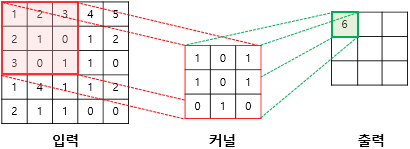


2. 두번째 스텝


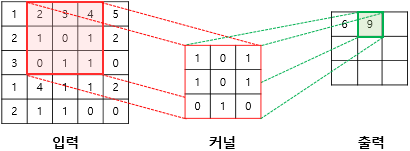

3. 세번째 스텝


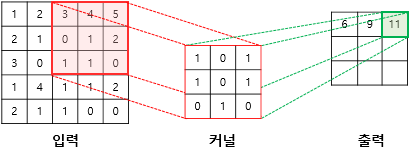

위와 같은  방식으로 9번의 스텝까지 마친다면 아래와 같은 특성 맵(feature map)이 생성된다.

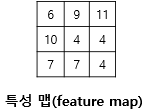

위의 예시에서는 커널의 이동 범위가 한 칸이었다. 이러한 이동 범위 또한 사용자가 지정할 수 있다. 이를 **스트라이드(stride)**라고 한다.

위와 같은 예시에서는 5 x 5의 이미지가 합성곱 연산 이후 3 x 3의 특성맵이 되었다. 이와 같이 합성곱 연산의 특성맵은 원본 이미지보다 크기가 작아진다는 특징을 갖고 있다. 그렇기 때문에 합성곱 연산을 여러 번 한다면 특성 맵의 크기는 원본 이미지 보다 매우 작아질 것이다. 만약 특성 맵의 크기가 원본의 크기와 동일하게 유지되기 원한다면 **패딩(padding)**을 사용하면 된다.

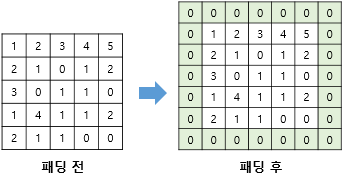

패딩은 합성곱 연산을 하기 전 입력의 가장자리에 지정된 개수의 폭만큼 행과 열을 추가해주는 것을 말한다. 주로 값을 0으로 채우는 **제로 패딩(zero padding)**을 사용합니다. 



# 1.4 합성곱 신경망의 가중치(weight)와 편향(bias)

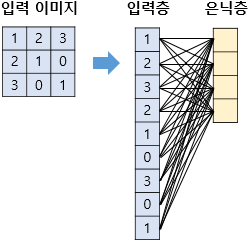

3 x 3 크기의 이미지를 다층 퍼셉트론으로 처리한다고하면 위의 이미지처럼 36개의 가중치가 필요하다.

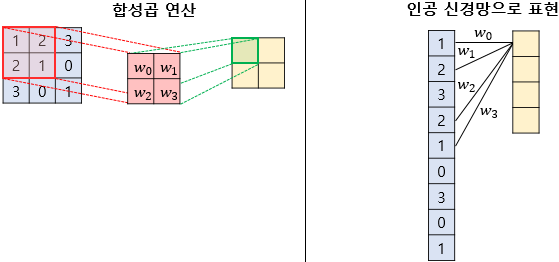

위의 이미지는 합성곱 신경망으로 2 x 2 커널을 사용하고 스트라이드는 1인 상태이다. 위의 이미지를 보면 알다시피 합성곱 신경망에서의 가중치는 커널 행렬의 원소들이다. 이를 인공 신경망의 형태로 표현하면 오른쪽 그림과 같다. 정리하면 **합성곱 신경망에서의 가중치는 커널의 크기**(4개)와 같다. 이는 다층 퍼셉트론을 사용할때보다 훨씬 적은 수의 가중치로 **공간적 구조 정보를 보존한다는 특징**을 갖고 있다.

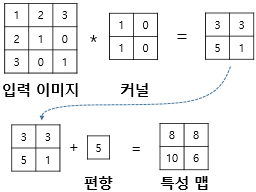

커널을 통해 출력된 특성맵은 하나의 **편향(bias)**이 더해지게 된다.

이후 특성 맵은 비선형성 추가를 위해 활성화 함수를 지나게 된다. 이때 활성화 함수는 렐루 함수 또는 렐루 함수의 변형들이 주로 사용된다.

# +   활성화 함수

# 1.5 특성 맵 크기 계산